In [ ]:
import json, sys, random
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [ ]:
from PIL import Image, ImageDraw 

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
f = open('/content/drive/MyDrive/Ships Dataset/shipsnet.json')
dataset = json.load(f)
f.close()

In [ ]:
for key in dataset:
   print ("key: %s " % (key))

key: data 
key: labels 
key: locations 
key: scene_ids 


In [ ]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [ ]:
input_data

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

In [ ]:
input_data.shape

(4000, 19200)

In [ ]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
output_data.shape

(4000,)

In [ ]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [ ]:
X.shape

(4000, 3, 80, 80)

In [ ]:
# get one chanel
pic = X[1]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

In [ ]:
pic

array([[[76, 75, 67, ..., 78, 77, 80],
        [71, 73, 72, ..., 79, 77, 81],
        [73, 70, 67, ..., 81, 79, 82],
        ...,
        [73, 71, 68, ..., 68, 68, 62],
        [69, 71, 70, ..., 63, 66, 66],
        [71, 69, 69, ..., 61, 63, 63]],

       [[86, 85, 77, ..., 86, 87, 89],
        [82, 83, 81, ..., 86, 87, 91],
        [83, 80, 76, ..., 89, 89, 92],
        ...,
        [79, 76, 73, ..., 76, 76, 71],
        [77, 77, 76, ..., 72, 75, 75],
        [80, 76, 75, ..., 69, 71, 72]],

       [[70, 70, 64, ..., 70, 72, 72],
        [67, 69, 68, ..., 70, 72, 75],
        [69, 66, 64, ..., 73, 72, 76],
        ...,
        [65, 64, 61, ..., 61, 61, 57],
        [63, 63, 63, ..., 57, 60, 60],
        [66, 62, 62, ..., 54, 57, 58]]], dtype=uint8)

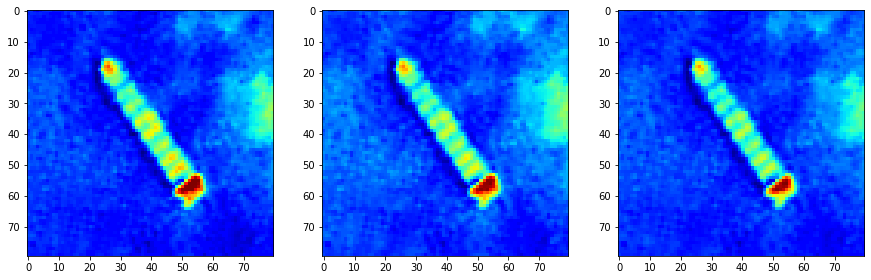

In [ ]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
plt.show()

In [ ]:
output_data.shape

(4000,)

In [ ]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
np.bincount(output_data)

array([3000, 1000])

In [ ]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [ ]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [ ]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [ ]:
# normalization
X_train = X_train / 255

In [ ]:
np.random.seed(42)

In [ ]:
# network design----needs to be changed {check for YOLO or RCNN architectures}
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
70/70 - 8s - loss: 0.4086 - accuracy: 0.8129 - val_loss: 0.1908 - val_accuracy: 0.9554
Epoch 2/18
70/70 - 0s - loss: 0.1587 - accuracy: 0.9442 - val_loss: 0.0895 - val_accuracy: 0.9696
Epoch 3/18
70/70 - 0s - loss: 0.1385 - accuracy: 0.9554 - val_loss: 0.1387 - val_accuracy: 0.9482
Epoch 4/18
70/70 - 0s - loss: 0.0959 - accuracy: 0.9629 - val_loss: 0.0579 - val_accuracy: 0.9768
Epoch 5/18
70/70 - 0s - loss: 0.0907 - accuracy: 0.9719 - val_loss: 0.0529 - val_accuracy: 0.9875
Epoch 6/18
70/70 - 0s - loss: 0.0676 - accuracy: 0.9772 - val_loss: 0.0479 - val_accuracy: 0.9821
Epoch 7/18
70/70 - 0s - loss: 0.0595 - accuracy: 0.9795 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 8/18
70/70 - 0s - loss: 0.0573 - accuracy: 0.9844 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 9/18
70/70 - 0s - loss: 0.0473 - accuracy: 0.9844 - val_loss: 0.0323 - val_accuracy: 0.9911
Epoch 10/18
70/70 - 0s - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0497 - val_accuracy: 0.9786
Epoch 11/18
70/70 -

In [ ]:
image = Image.open('/content/drive/MyDrive/Ships Dataset/scenes/scenes/lb_1.png')
pix = image.load()

In [ ]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [ ]:
image.size

(2001, 1749)

In [ ]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [ ]:
pix

In [ ]:
picture_vector.shape

(10499247,)

In [ ]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

In [ ]:
picture_vector

array([146, 155, 112, ...,  55,  53,  48], dtype=uint8)

In [ ]:
picture_vector.shape

(10499247,)

In [ ]:
picture_tensor

array([[[146, 125, 106],
        [155, 131, 114],
        [112,  97,  85],
        ...,
        [197, 179, 158],
        [193, 176, 156],
        [208, 187, 169]],

       [[135, 115,  99],
        [151, 127, 109],
        [ 85,  75,  66],
        ...,
        [207, 188, 169],
        [203, 184, 166],
        [209, 187, 169]],

       [[ 91,  80,  67],
        [118, 100,  83],
        [ 69,  61,  53],
        ...,
        [204, 186, 165],
        [201, 181, 161],
        [203, 180, 163]],

       ...,

       [[ 33,  47,  47],
        [ 35,  47,  48],
        [ 36,  48,  49],
        ...,
        [ 41,  57,  53],
        [ 45,  61,  56],
        [ 45,  62,  56]],

       [[ 32,  47,  46],
        [ 33,  46,  46],
        [ 32,  45,  46],
        ...,
        [ 44,  59,  55],
        [ 44,  59,  55],
        [ 40,  56,  51]],

       [[ 34,  49,  48],
        [ 35,  49,  49],
        [ 29,  43,  44],
        ...,
        [ 43,  59,  55],
        [ 40,  56,  53],
        [ 36,  51,  48]]

In [ ]:
picture_tensor.shape

(1749, 2001, 3)

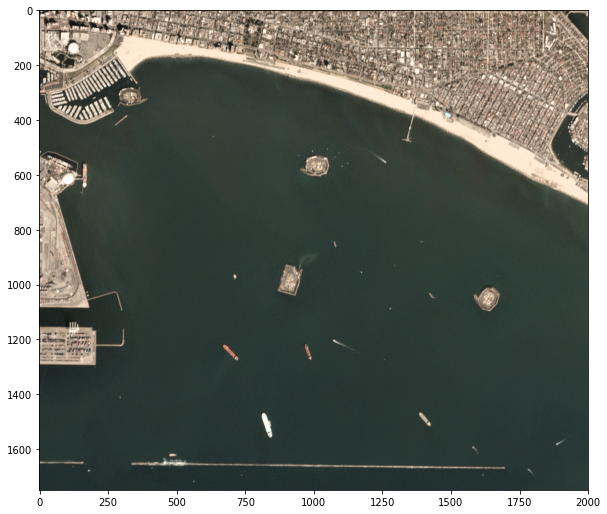

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

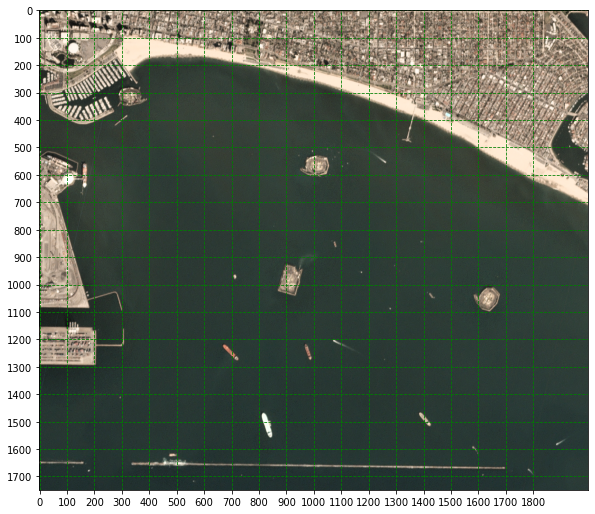

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('/content/drive/MyDrive/Ships Dataset/scenes/scenes/lb_1.png')

# Set up figure
fig=plt.figure(figsize=(15,30))
ax=fig.add_subplot(311)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='--', color='g')

# Add the image
ax.imshow(image)

In [ ]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [ ]:
picture_tensor.shape

(3, 1749, 2001)

In [ ]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [ ]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [ ]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:290 Y:190  [[0.02726317 0.97273684]]


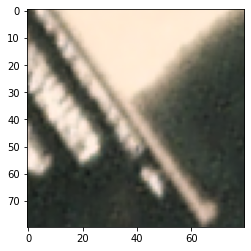

X:300 Y:270  [[0.08741478 0.9125852 ]]


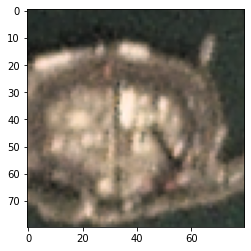

X:1310 Y:390  [[0.00770999 0.99228996]]


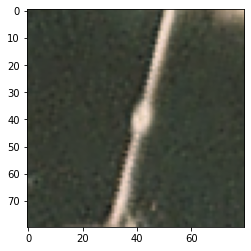

X:120 Y:560  [[0.0623696 0.9376304]]


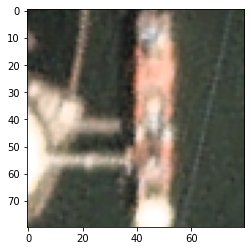

X:250 Y:1010  [[0.00395737 0.9960426 ]]


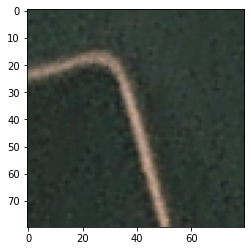

X:270 Y:1150  [[0.09399127 0.9060087 ]]


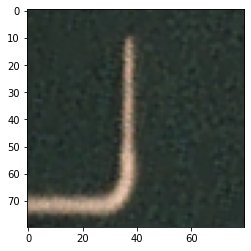

X:650 Y:1200  [[3.8077644e-05 9.9996197e-01]]


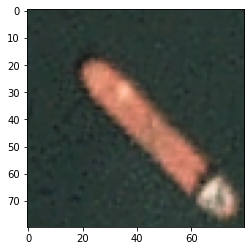

X:940 Y:1200  [[0.03437395 0.96562606]]


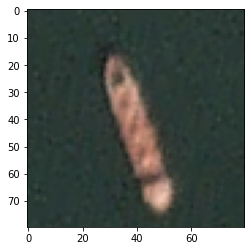

X:1360 Y:1440  [[0.01210333 0.9878967 ]]


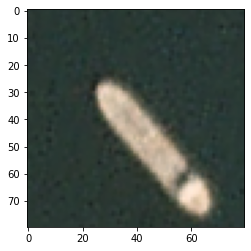

X:790 Y:1460  [[0.00347964 0.9965204 ]]


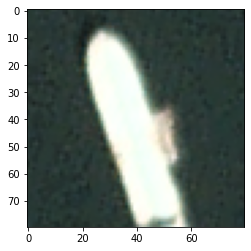

X:0 Y:1610  [[0.08931115 0.9106888 ]]


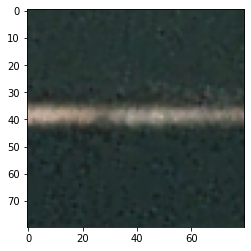

X:80 Y:1610  [[0.03697739 0.96302265]]


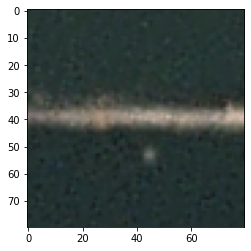

X:320 Y:1610  [[0.06449997 0.9355    ]]


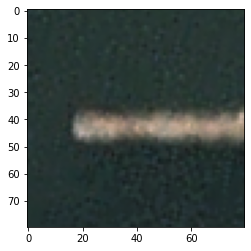

X:420 Y:1610  [[0.0616376 0.9383624]]


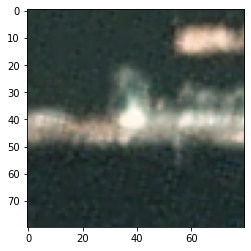

X:810 Y:1620  [[0.06655101 0.933449  ]]


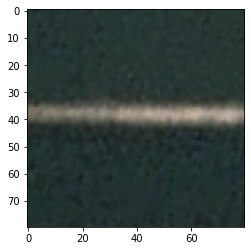

X:890 Y:1620  [[0.02099872 0.97900134]]


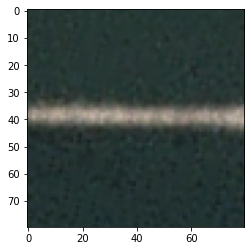

X:970 Y:1620  [[0.01069209 0.98930794]]


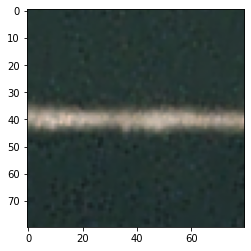

X:1050 Y:1620  [[0.01284298 0.98715705]]


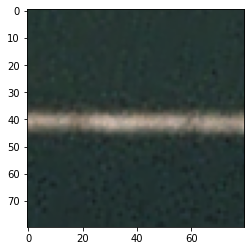

X:1130 Y:1620  [[0.04245446 0.9575455 ]]


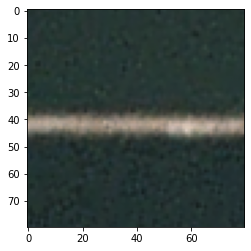

X:1210 Y:1620  [[0.03313712 0.9668629 ]]


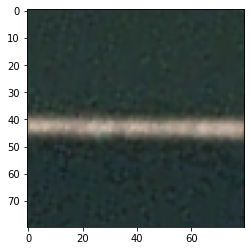

X:1320 Y:1630  [[0.09236178 0.90763825]]


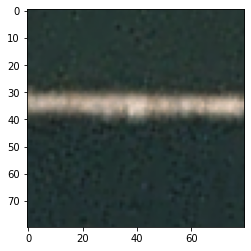

X:1420 Y:1630  [[0.096728   0.90327203]]


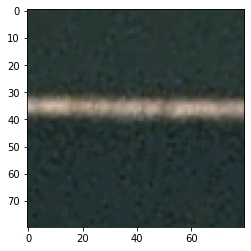

X:1500 Y:1630  [[0.0413569 0.9586431]]


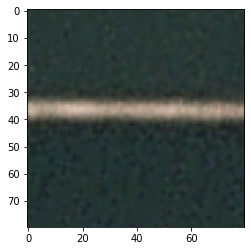

X:1580 Y:1630  [[0.02942204 0.97057796]]


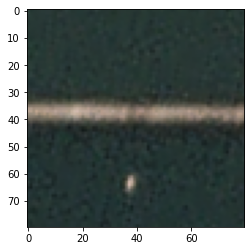

X:1920 Y:1660  

In [ ]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step)):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 80, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [ ]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [ ]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1749, 2001, 3)

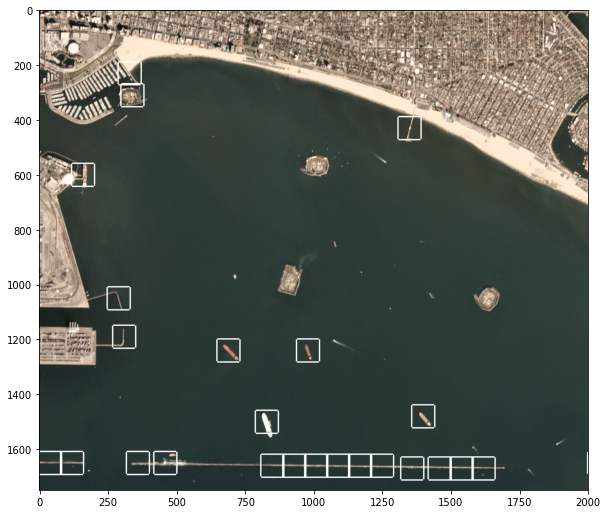

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()